In [18]:
import forallpeople
forallpeople.environment('structural', top_level=True)
from math import sqrt
import streamlit as st
from handcalcs.decorator import handcalc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from math import pi,sqrt
import PyNite
from PyNite import FEModel3D

# Lets analyze the same beam using Sympy 

## 1. Imports

In [35]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

## 2. Input Values

In [36]:
# Input data
span = 3.0           # m
uniform_D = 3.2      # kN/m
uniform_L = 4.8      # kN/m
uniform_start = 0    # starting point for the uniform load , 0m
uniform_end = span   # End point for the uniform load, equal to span length
uniform_factored = 1.25*uniform_D+1.5*uniform_L

## 3. Define your "symbols"
```python
E, I = symbols("E I") # E and I can be unknowns if solving for shear and moment only
R1, R2, R3 = symbols("R1 R2 R3") # Our unknown reactions as algebraic symbols
```

In [37]:
# Define symbol for the beam object
E, I = symbols("E I")
R1, R2 = symbols("R1 R2")

## 4. Create your `Beam` object

```python
my_beam = Beam(L, E, I)
```

A `Beam` object, takes three _parameters_:

1. `L` (length, in whatever units you wish)
2. `E` (elastic modulus, can either be a symbol or a number)
3. `I` ($I_z$, can either be a symbol or a number)

In [38]:
my_beam = Beam(span, E, I)

## 5. Apply loads

```python
my_beam.apply_load(value, start, order, end) 
```
1. `value` (magnitude of uniform load that will be applied)
2. `start` (starting point)
3. `order` (number representing the type of load - see documentation, for constant distributed load, order = 0)
4. `end`   (end point on the beam)
```

In [39]:
# Apply uniform load
my_beam.apply_load(uniform_factored, 0, 0, span)


## 5. Apply reactions/boundary conditions 

### Use `.apply_loads()` with symbols (unknowns) as magnitudes

```python
my_beam.apply_load(R, location, order) 
```

1. `R` (Unknown reaction)
2. `location` (location on the beam)
3. `order` (number representing the type of load - see documentation, for point load, order = -1)

```python
my_beam.bc_deflection = [(location1, value), (location2, value)]
```


1. `location1` (Unknown reaction location)
2. `value` (desired deflection at that location which is 0)

```

In [40]:
# Apply boundary condition
my_beam.apply_load(R1, 0, -1)
my_beam.apply_load(R2, span, -1)

my_beam.bc_deflection = [(0, 0), (span, 0)]

## 6. Solve for reactions

```python
my_beam.solve_for_reaction_loads(R1, R2)
```

You must put the unknown reaction symbols as parameters to `.solve_for_reaction_loads()`

In [41]:
my_beam.solve_for_reaction_loads(R1, R2)

## 7. Show results

There are many results you can review now that the beam is solved:

* `my_beam.reaction_loads`
* `my_beam.plot_shear_force()`
* `my_beam.plot_bending_moment()`
* `my_beam.plot_deflection(subs={E: 1000, I: 50})`

With `.plot_deflection()`, you must provide values for both `E` and `I`. You can use the `subs` parameter to substitute values in for your `E` and `I` symbols if you used symbols in your original `Beam()` definition.

{R1: -16.8000000000000, R2: -16.8000000000000}


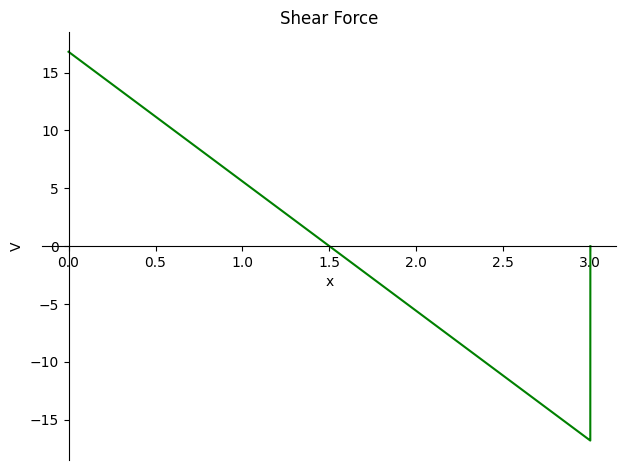

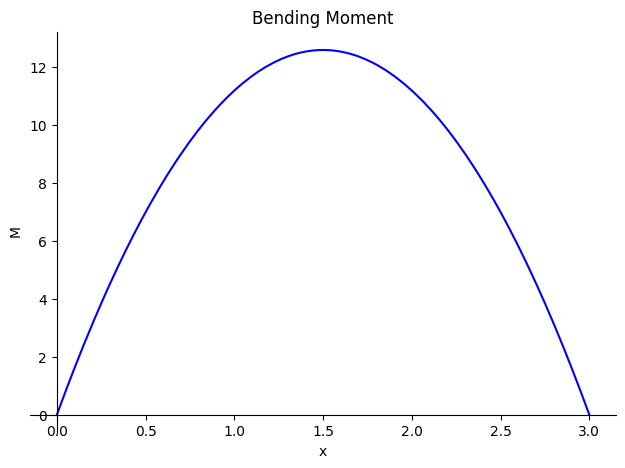

In [42]:
print(my_beam.reaction_loads)
my_beam.plot_shear_force()
my_beam.plot_bending_moment()